In [1]:
import numpy as np
import matplotlib.pyplot as plt

Let't do some simple tests to check whether this permutation tests have a satisfying power for the observed situation.

# Simple test

Let's create a situation on which the null hypothesis is false, and the situation is actually the one observed in item (c) of notebook `q1_svm_pca_k.ipynb`, but assuming a normal distribution.

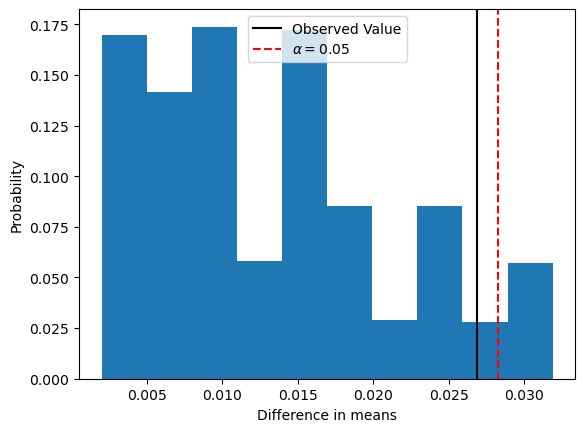

In [29]:
np.random.seed(41)

# Assuming the null hypotesis as false
sample_a = np.random.normal(loc=0.9425, scale=0.029, size=4)  # (0.9425, 0.028613807855648963)
sample_b = np.random.normal(loc=0.9625, scale=0.019, size=4) # (0.9624999999999999, 0.019202864369671536)



mu_a = np.mean(sample_a)
mu_b = np.mean(sample_b)

test_statistics = abs(mu_a - mu_b)

data = np.concat([sample_a, sample_b])
tests = []

for _ in range(100_000):
    np.random.shuffle(data)
    a, b = data[:4], data[4:]
    tests.append(abs(np.mean(a) - np.mean(b)))

counts, edges = np.histogram(tests, bins=10)

alpha = np.percentile(tests, 95) 
plt.bar(edges[1:], counts/sum(counts), width=(edges[0]-edges[1])) 

# plt.plot(edges[1:], np.cumsum(counts/sum(counts)))

plt.axvline(test_statistics, c="k", label="Observed Value")
plt.axvline(alpha, c="r", ls="--", label=r"$\alpha = 0.05$")

plt.ylabel("Probability")
plt.xlabel("Difference in means")
plt.legend()

Now let't use the setup above to calculate power.

In [31]:


np.random.seed(41)
results = []

SS = 4


for _ in range(500):
    # Assuming the null hypotesis as false
    sample_a = np.random.normal(loc=0.9425, scale=0.029, size=SS)  # (0.9425, 0.028613807855648963)
    sample_b = np.random.normal(loc=0.9625, scale=0.019, size=SS) # (0.9624999999999999, 0.019202864369671536)
    
    # Calculating means
    mu_a = np.mean(sample_a)
    mu_b = np.mean(sample_b)
    
    test_statistics = abs(mu_a - mu_b)
    
    data = np.concat([sample_a, sample_b])
    tests = []
    
    for _ in range(10_000):
        np.random.shuffle(data)
        a, b = data[:SS], data[SS:]
        tests.append(abs(np.mean(a) - np.mean(b)))
    
    results.append((sum(tests >= test_statistics) / len(tests)).item() < 0.05)
    

np.mean(results).item()

0.146

# Let's check other tests

In [32]:
from scipy.stats import mannwhitneyu



In [39]:
np.random.seed(41)
results = []

SS = 45


for _ in range(1000):
    # Assuming the null hypotesis as false
    sample_a = np.random.normal(loc=0.9425, scale=0.029, size=SS)  # (0.9425, 0.028613807855648963)
    sample_b = np.random.normal(loc=0.9625, scale=0.019, size=SS) # (0.9624999999999999, 0.019202864369671536)
    
    results.append(mannwhitneyu(sample_a, sample_b)[1].item() <= 0.05)
    

np.mean(results).item()

0.95